In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


## Assumptions of Multivariable Linear Regression

### Assumption 1: linear relationship


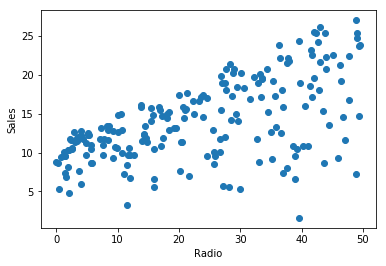

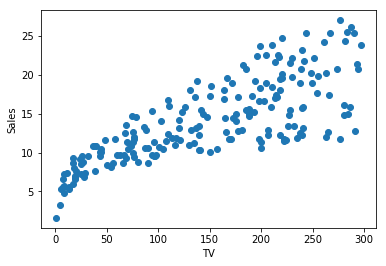

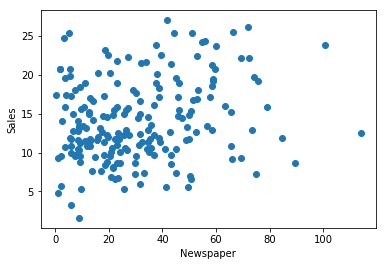

In [3]:
plt.scatter(data.Radio, data.Sales)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

plt.scatter(data.TV, data.Sales)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

plt.scatter(data.Newspaper, data.Sales)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

### Assumption 2: multivariate normality

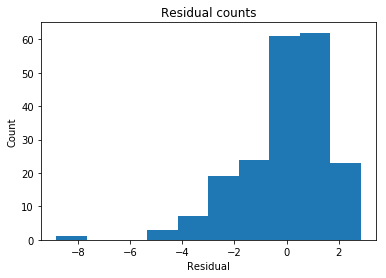

In [4]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Assumption 3: homoscedasticity

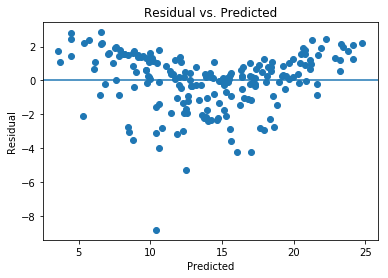

In [5]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

### Assumption 4: low multicollinearity

In [6]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


# Drill: Fixing assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality. Use the cell(s) below to see what you can do to fix it.

In [14]:
data['TV_sqrt'] = np.sqrt(data['TV'])
data['Radio_sqrt'] = np.sqrt(data['Radio'])
data['Newspaper_sqrt'] = np.sqrt(data['Newspaper'])

data['Sales_Sqrt'] = np.sqrt(data['Sales'])
data['Sales_Sq'] = data['Sales'] ** 2
data['Sales_Log'] = np.log(data['Sales'])

data['TVxRadio'] = data['TV'] * data['Radio']
data['TVxRadio_Sqrt'] = np.sqrt(data['TV'] * data['Radio'])

data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,TV_sqrt,Radio_sqrt,Newspaper_sqrt,Sales_Sqrt,Sales_Sq,Sales_Log,TVxRadio,TVxRadio_Sqrt
0,1,230.100,37.800,69.200,22.100,15.169,6.148,8.319,4.701,488.410,3.096,8697.780,93.262
1,2,44.500,39.300,45.100,10.400,6.671,6.269,6.716,3.225,108.160,2.342,1748.850,41.819
2,3,17.200,45.900,69.300,9.300,4.147,6.775,8.325,3.050,86.490,2.230,789.480,28.098
3,4,151.500,41.300,58.500,18.500,12.309,6.427,7.649,4.301,342.250,2.918,6256.950,79.101
4,5,180.800,10.800,58.400,12.900,13.446,3.286,7.642,3.592,166.410,2.557,1952.640,44.189


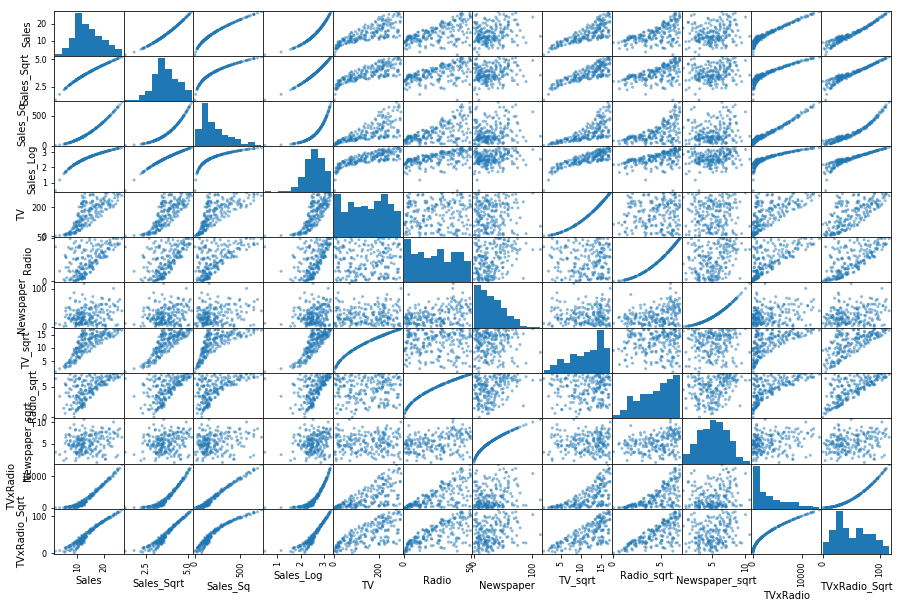

In [16]:
pd.plotting.scatter_matrix(data[['Sales','Sales_Sqrt', 'Sales_Sq', 'Sales_Log', 
                                 'TV','Radio','Newspaper', 'TV_sqrt', 'Radio_sqrt', 'Newspaper_sqrt',
                                 'TVxRadio', 'TVxRadio_Sqrt']], figsize=(15, 10))
plt.show()

Among the scatter plots, we can see the strong correlations with TV, Radio, TV_sqrt, Radio_sqrt, TVxRadio, TVxRadio_sqrt. 

As my first try-out, I only utilize TV, Radio, Newspaper as training features. 


Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


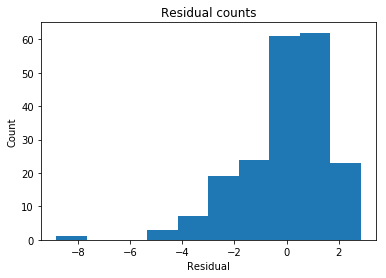

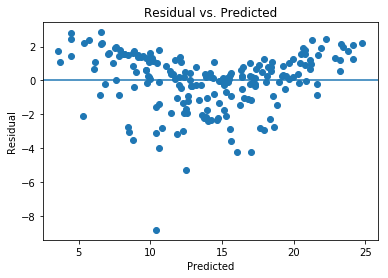

In [31]:
# Instantiate and fi our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


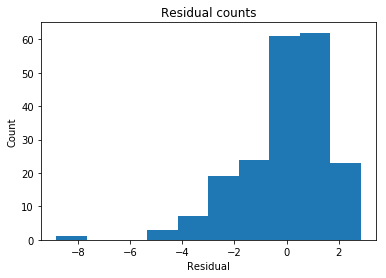

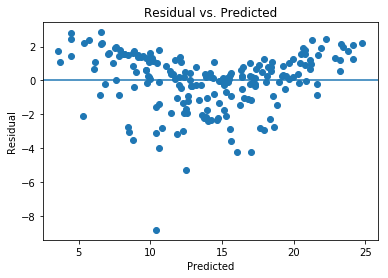

In [30]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Hmmmm... It seems still heteroscedasticity. It tells us there is uncovered non-linearity in sales which could not be explained by linear features. Also, the coefficient of Newspaper is very close to zero. We can neglect it in the next fitting. 

In this time, I utilized all variables what I generated and utilized in the previous scatter plots. 


Coefficients: 
 [[ -2.83152357e-02   6.32834081e-02   7.19206944e-03   9.85382138e-01
   -2.80963995e-01  -5.61179512e-02   9.18751788e-04   2.20737056e-02]]

Intercept: 
 [ 2.46493847]

R-squared:
0.994737170521


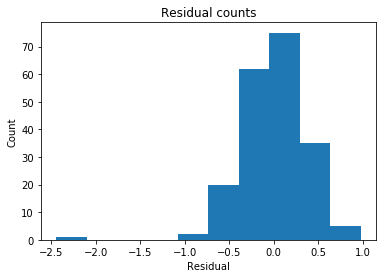

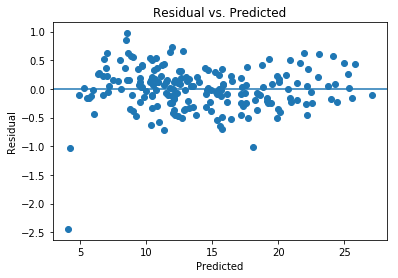

In [33]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper', 'TV_sqrt', 'Radio_sqrt', 'Newspaper_sqrt', 'TVxRadio', 'TVxRadio_Sqrt']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In the Residual vs Predicted plot, the heteroscedasticity becomes weaker. Also, R-sqaured increased to 0.995. To prevent overfitting, we only utilize the features with higher coefficients including TV, Radio, TV_sqrt, TVxRadio. 


Coefficients: 
 [[ -3.09561887e-02   4.29420145e-02   1.08113069e+00   1.04053642e-03]]

Intercept: 
 [ 1.61608504]

R-squared:
0.994565979076


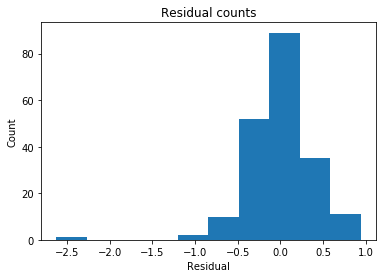

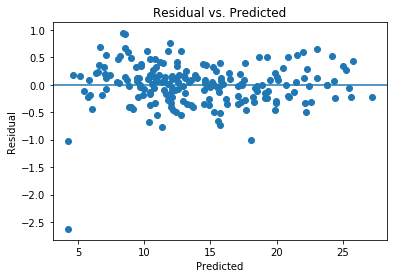

In [29]:
# Instantiate and fi our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio', 'TV_sqrt', 'TVxRadio']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()